In [1]:
import xarray as xr
import numpy  as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

从mask后的数据计算每月的情况，将13年的4-8月绘制热图比较<br>

此处简单地做了个减法

remains:绘制更多统计量的

In [5]:
# 读取数据
# year = "2006"
# 注释掉的是原始数据，此后的是进行了mask之后的数据
# dir_vr = "/raid52/yycheng/MPAS/VR_postprocess/VR_merge/pre/" + "daily_pre_03-15.nc"
dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_mean_vr_03-15.nc"
ds_vr_mean = xr.open_dataset(dir_vr)

dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_max_vr_03-15.nc"
ds_vr_max = xr.open_dataset(dir_vr)

dir_vr = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_min_vr_03-15.nc"
ds_vr_min = xr.open_dataset(dir_vr)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_mean_rcm_03-15.nc"
ds_rcm_mean = xr.open_dataset(dir_rcm)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_max_rcm_03-15.nc"
ds_rcm_max = xr.open_dataset(dir_rcm)

dir_rcm = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/mask_res/" + "mask_min_rcm_03-15.nc"
ds_rcm_min = xr.open_dataset(dir_rcm)


obs_cn051_tm  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tm_1961_2018_daily_025x025.nc"
ds_cn051_tm = xr.open_dataset(obs_cn051_tm)
obs_cn051_tmax  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tmax_1961_2018_daily_025x025.nc"
ds_cn051_tmax = xr.open_dataset(obs_cn051_tmax)
obs_cn051_tmin  = "/raid52/yycheng/MPAS/REFERENCE/TEMP_DATA/mask_t2m/ordata/" +  "sel_CN05.1_Tmin_1961_2018_daily_025x025.nc"
ds_cn051_tmin = xr.open_dataset(obs_cn051_tmin)

# ds_cn051_time_loc_year = (ds_cn051.time.dt.year >= 2003) & (ds_cn051.time.dt.year <= 2015)
# ds_cn051_time_loc_month= (ds_cn051.time.dt.month>=    4) & (ds_cn051.time.dt.month <= 8)
# ds_cn051_sel = ds_cn051_tm.isel(time = ds_cn051_time_loc_year & ds_cn051_time_loc_month)

# ds_cmorph
# precip_obs = ds_disk["precip_CMORPH"]
# precip_mod = ds_disk["precip_MPAS"]
# vr_mean         = ds_vr_mean['t2m'].mean(dim=["longitude","latitude"])
# vr_mean_max     = ds_vr_max['t2m'].mean(dim=["longitude","latitude"])
# vr_mean_min     = ds_vr_min['t2m'].mean(dim=["longitude","latitude"])

# rcm_mean        = ds_rcm_mean['t2m'].mean(dim=["longitude","latitude"])
# rcm_mean_max    = ds_rcm_max['t2m'].mean(dim=["longitude","latitude"])
# rcm_mean_min    = ds_rcm_min['t2m'].mean(dim=["longitude","latitude"])

# cn051_tm_mean  = ds_cn051_tm['tm'].mean(dim=['lon','lat'])
# cn051_tmax_mean  = ds_cn051_tmax['tmax'].mean(dim=['lon','lat'])
# cn051_tmin_mean  = ds_cn051_tmin['tmin'].mean(dim=['lon','lat'])

# vr_mean     = vr_mean - 273.15
# vr_mean_max =vr_mean_max - 273.15
# vr_mean_min =vr_mean_min - 273.15
# rcm_mean    =rcm_mean - 273.15
# rcm_mean_max    =rcm_mean_max - 273.15
# rcm_mean_min    =rcm_mean_min - 273.15

为了方便不更换变量名，用计算后的变量rmsd复制到此前的vr_mean上<br>
对于RMSD的计算还存疑，是先进行了直接做差之后的平方，之后在平均之后开根，类似于每个空间pattern做了一个RMSD，在每个时间维度上，这里需不需要提前对空间pattern做月平均？

0328
    
    修改为先进行月平均图的计算之后再进行空间pattern的RMSD的计算

In [10]:
# 计算月平均
obs_monmean  = ds_cn051_tm['tm'].resample(time="1MS", skipna=True).mean().dropna(dim='time', how = "all")
vr_monmean   = ds_vr_mean['t2m'].resample(Time="1MS", skipna=True).mean().dropna(dim='Time', how = "all")
rcm_monmean  = ds_rcm_mean['t2m'].resample(Time="1MS", skipna=True).mean().dropna(dim='Time', how = "all")
vr_monmean =  vr_monmean - 273.15
rcm_monmean = rcm_monmean - 273.15

In [11]:
# 计算RMSD

# vr_rmsd  = (ds_cn051['pre'].values - ds_vr['precip_MPAS'].values)**2
# rcm_rmsd = (ds_cn051['pre'].values - ds_rcm['precip_MPAS'].values)**2

vr_rmsd  = (vr_monmean.values - obs_monmean.values)**2
rcm_rmsd = (rcm_monmean.values - obs_monmean.values)**2

vr_rmsd_xr = xr.DataArray(vr_rmsd, coords = vr_monmean.coords)
rcm_rmsd_xr = xr.DataArray(rcm_rmsd, coords = rcm_monmean.coords)
# 先取平均再开根
vr_mean = np.sqrt(vr_rmsd_xr.mean(dim=["longitude","latitude"]))
rcm_mean = np.sqrt(rcm_rmsd_xr.mean(dim=["longitude","latitude"]))

计算月平均

In [12]:
# rename coordinates
vr_mean = vr_mean.rename({"Time":"time"})
rcm_mean = rcm_mean.rename({"Time":"time"})

In [13]:
# cn051_monmean_temp = cn051_mean.resample(time="1MS").mean().dropna(dim='time')
# cn051_monmean      = dict(cn051_monmean_temp.groupby(cn051_monmean_temp.time.dt.year))

vr_monmean_temp = vr_mean.resample(time="1MS").mean().dropna(dim='time')
vr_monmean      = dict(vr_monmean_temp.groupby(vr_monmean_temp.time.dt.year))

rcm_monmean_temp = rcm_mean.resample(time="1MS").mean().dropna(dim='time')
rcm_monmean      = dict(rcm_monmean_temp.groupby(rcm_monmean_temp.time.dt.year))

In [14]:
timeseries03_15 = pd.date_range("2003","2015",freq="AS")
timeseries03_15
# cn051_pd.columns = timeseries03_15

DatetimeIndex(['2003-01-01', '2004-01-01', '2005-01-01', '2006-01-01',
               '2007-01-01', '2008-01-01', '2009-01-01', '2010-01-01',
               '2011-01-01', '2012-01-01', '2013-01-01', '2014-01-01',
               '2015-01-01'],
              dtype='datetime64[ns]', freq='AS-JAN')

In [15]:
# cn051_pd = pd.DataFrame(cn051_monmean)
# cn051_pd.index = ['Apr','May','Jun','Jul','Aug']
# cn051_pd
# cn051_pd.columns = timeseries03_15

vr_pd = pd.DataFrame(vr_monmean)
vr_pd.index = ['Apr','May','Jun','Jul','Aug']
# vr_pd
vr_pd.columns = timeseries03_15

rcm_pd = pd.DataFrame(rcm_monmean)
rcm_pd.index = ['Apr','May','Jun','Jul','Aug']
# rcm_pd
rcm_pd.columns = timeseries03_15

In [16]:
compared = (vr_pd - rcm_pd)

绘图，使用seaborn的绘图版绘制<br>
打算使用的 matplotlib.dates 不能正常工作，手工添加坐标

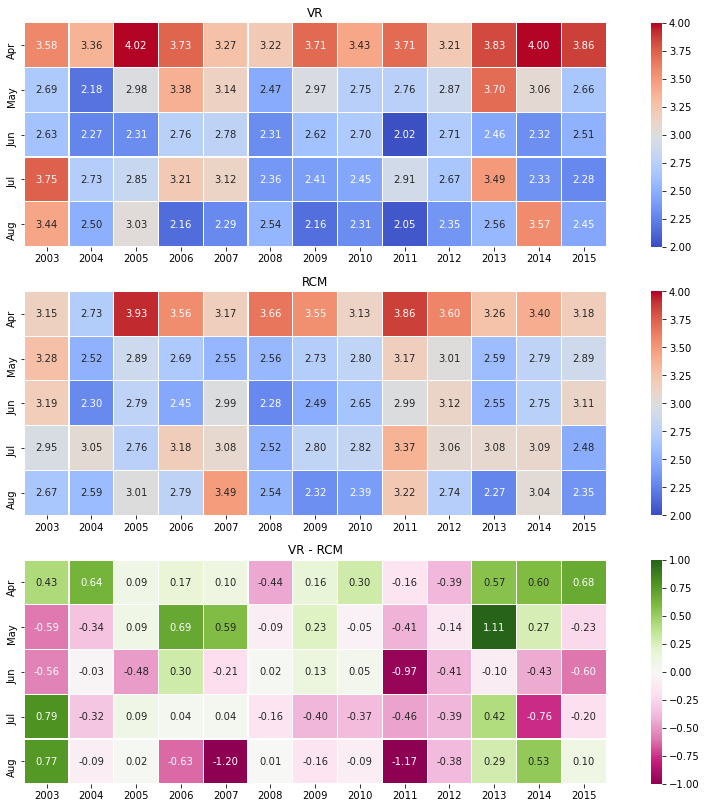

In [18]:
import seaborn as sns
import matplotlib.dates as mdates
import datetime
import matplotlib.colors as mcolors
# plt.figure(figsize=(14,4))
fig,ax = plt.subplots(3,1,figsize=(16,14))

years = mdates.YearLocator()   # every year
# months = mdates.MonthLocator()  # every month
years_fmt = mdates.DateFormatter('%Y')
# 背景设置为白色，否则会成为透明，png格式下
fig.patch.set_facecolor('white')

# 重新映射颜色，但其实影响不大
norm = mcolors.Normalize(vmin=2, vmax=6)

sns.heatmap(compared, ax = ax[2], vmin=-1, vmax=1 ,fmt = ".2f", square= True,linewidths=.2, cmap="PiYG",
annot=True)
sns.heatmap(vr_pd, ax = ax[0], vmin = 2., vmax = 4. ,fmt = ".2f", square= True,linewidths=.2, cmap="coolwarm", 
annot=True)
sns.heatmap(rcm_pd, ax = ax[1], vmin = 2., vmax = 4. ,fmt = ".2f", square= True,linewidths=.2, cmap="coolwarm", 
annot=True)
# ax.xticks(rotation=0)
# ax[0].set_title("CN051")
ax[0].set_title("VR")
ax[1].set_title("RCM")
ax[2].set_title("VR - RCM")

# 额外的添加坐标轴的部分
xticks = pd.date_range(datetime.datetime(2003,1,1), datetime.datetime(2015,1,1), freq='ys')
for i in ax:
    i.set_xticklabels([x.strftime('%Y') for x in xticks]); 
    # rotated every ticks
    for tick in i.get_xticklabels():
        tick.set_rotation(0)

# does not work
# ax[2].xaxis.set_major_locator(years)
# ax[2].xaxis.set_minor_locator(years)
# ax[2].xaxis.set_major_formatter(years_fmt)
# ax[2].xaxis.set_minor_formatter(years_fmt)

plt.savefig("./output_pic/heatplot_months_RMSD_avefirst.png")